Model of a generalized Josephson Junction Array

Authors: Cliff Sun, Harshvardhan, Alexey Bezryadin

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.integrate import quad 

In [38]:
def generate_random_numbers(n):
    random_numbers = [random.uniform(0, 1) for _ in range(n)]
    return random_numbers

# Example: Generate 5 random numbers
num_of_junctions = 30
random_numbers = np.array(np.sort(generate_random_numbers(2 * num_of_junctions)))

In [39]:
# arrayOfJunctions = [0, 0.2, 0.4, 0.6, 0.9, 1] # Where the junctions are located; must be even amount of junctions (includes 0 and 1)
# arrayOfJunctions = random_numbers
# arrayOfJunctions = [0, 0.001, 0.25, 0.251, 0.5, 0.501, 0.75, 0.751, 0.999, 1]
# arrayOfJunctions = [0, 0.001, 0.999, 1]
# arrayOfJunctions = [0, 0.1, 0.2, 0.3, 0.5, 0.7, 0.8, 0.9]
# arrayOfJunctions = [0.6, 0.7, 0.8, 1]
# # arrayOfJunctions = np.concatenate([arrayOfJunctions, random_numbers])
# arrayOfJunctions = np.concatenate([random_numbers, arrayOfJunctions])
# arrayOfJunctions = [0, 0.001, 0.97, 1]
# arrayOfJunctions[-1] = 1
# arrayOfJunctions[0] = 0
# arrayOfJunctions = [0, 0.001, 0.2, 0.201, 0.4, 0.401, 0.6, 0.601, 0.8, 0.801, 0.98, 1]
# arrayOfJunctions = random_numbers
arrayOfJunctions = [0, 0.001, 0.999, 1]
print(arrayOfJunctions)
print(len(arrayOfJunctions))

[0, 0.001, 0.999, 1]
4


In [40]:
def even_arrayOfWidths_noInput(sigma, numOfJunctions, width):
    delta = 4 / (numOfJunctions + 2) * sigma**2
    arrayOfWidths = np.zeros(numOfJunctions)
    arrOfWidthsDiv2 = np.zeros(numOfJunctions//2)
    # Creates the list of the terms generated by the delta, without accounting for the mean
    # NOT THE TRUE STANDARD DEVIATION - Need to account for both positives and minuses, this is just positive
    for i in range(1, numOfJunctions//2 + 1):
        arrOfWidthsDiv2[i - 1] = np.sqrt(i * delta)
    arrayOfWidths = np.concatenate((np.flip(-1 * arrOfWidthsDiv2), arrOfWidthsDiv2))
    minimum = min(arrayOfWidths)
    for i in range (len(arrayOfWidths)):
        arrayOfWidths[i] -= (minimum - width)
    return arrayOfWidths

In [41]:
def EvenArrayOfJunctions(sigma, numOfJunctions, width, arrayJ = []): # Generates an array of junctions given some standard deviation & mean width
    # Necessary Declarations
    junctionCenter = 1/(numOfJunctions - 1) # Declares the middle of the junction assuming zero junction width
    arrOfJunctions =  np.zeros(numOfJunctions * 2)
    arrayOfWidths = []
    if (sigma == 0 and len(arrayJ) != 0):
        return arrayJ
    arrayOfWidths = even_arrayOfWidths_noInput(sigma, numOfJunctions, width)
    # If the user inputted a custom array
    rannum = int(random.randint(0, numOfJunctions - 1))
    arr = np.zeros(numOfJunctions)
    arrOfJunctions[1] = arrayOfWidths[rannum]
    arr[rannum] = 1
    for k in range(2, 2*numOfJunctions - 2,2):
        while(arr[rannum] == 1):
            rannum = int(random.randint(0, numOfJunctions - 1))
        arrOfJunctions[k] = k//2 * junctionCenter - (arrayOfWidths[rannum]/2)
        arrOfJunctions[k + 1] = k//2 * junctionCenter + (arrayOfWidths[rannum]/2)
        arr[rannum] = 1

    for i in range(numOfJunctions):
        if (arr[i] == 0):
            arrOfJunctions[-2] = 1 - arrayOfWidths[i]
            arrOfJunctions[-1] = 1
            break
    
    return arrOfJunctions

In [42]:
# arrayOfJunctions = EvenArrayOfJunctions(0, 10, 0.0001)
# print(arrayOfJunctions)
# arrayOfJunctions = [0, 0.001, 0.2, 0.201, 0.4, 0.401, 0.6, 0.601, 0.8, 0.801, 0.98, 1]
# arrayOfJunctions[-2] = 0.99

In [43]:
critical_currents_density = np.ones(int(len(arrayOfJunctions) / 2)) # all the critical currents for each junction (Critical Currents are assumed to be 1 by default)

criticalCurrents = []

junctionWidths = []

for i in range(len(arrayOfJunctions)//2):
    junctionWidths.append(arrayOfJunctions[2*i+1] - arrayOfJunctions[2*i])

for i in range (len(junctionWidths)):
    criticalCurrents.append(junctionWidths[i] * critical_currents_density[i])

print(criticalCurrents)

print(np.sum(criticalCurrents))

[0.001, 0.0010000000000000009]
0.002000000000000001


prints out the elements in the junction in a better format

In [44]:
index = 0
while (index < (len(arrayOfJunctions) - 1)):
    if (index == len(arrayOfJunctions) - 2):
        print(str(arrayOfJunctions[index]) + " - " + str(arrayOfJunctions[index + 1]), end = " ")
    else:
        print(str(arrayOfJunctions[index]) + " - " + str(arrayOfJunctions[index + 1]) + ",", end = " ")
    index += 2

0 - 0.001, 0.999 - 1 

Parameters for Current -> Magnetic Field, Junction Locations, Critical Currents, Initial Phase Difference

B is the integer value of flux quanta present in the SQUID

In [45]:
def current(B, arrJ, arrC, y): # y is initial phase difference of the whole circuit, B is the magnetic field, arrJ is the location of junctions, arrC is critical current associated with each junction
    curr = 0 # summation of all currents in the entire junction
    limit = int(len(arrJ) / 2) # number of junctions in the SQUID
    numOfSegments = 0
    for n in range(limit):
        numOfSegments = 5 if (arrJ[2 * n + 1] - arrJ[2 * n]) < 0.05 else int(100 * (arrJ[2 * n + 1] - arrJ[2 * n]))
        sizeOfSegment = float((arrJ[2 * n + 1] - arrJ[2 * n]) / numOfSegments)
        for i in range(numOfSegments):
            curr += arrC[n] * np.sin(y + (2 * np.pi * B) * (arrJ[2 * n] + i * sizeOfSegment)) * (1/numOfSegments)

    # phase difference evolves according to 2 * pi * B

    # curr += (critical current element in array)(sin(y + (2 * pi * B) * length)
    return curr

In [46]:
def maxCurrent(B, arrayJ, arrayC): # Spits out the maximum current by varying the gauge invariant phase of the left end (free parameter) gamma
    Y=np.linspace(0, 4*np.pi, 150)
    dummyArray=[]
    for gamma in Y:
        dummyArray.append(current(B, arrayJ, arrayC, gamma))
    return max(dummyArray)

In [47]:
MagField = np.linspace(-10, 10, 10000) # an array of Magnetic Fields ranging from 0 to 100 with 5000 total elements

The 2 lines below is where the useful section of the code is for modeling a SQUID

In [48]:
IMaxPoint = []


In [49]:
length = len(MagField)
for i in range(length):
    IMaxPoint.append(maxCurrent(MagField[i], arrayOfJunctions, criticalCurrents) / np.sum(criticalCurrents)) # This integer represents the number of segments you want to cut each junction up into (the higher the number, the better the approximation)

The 2 lines above is where the useful section of the code is for modeling a SQUID

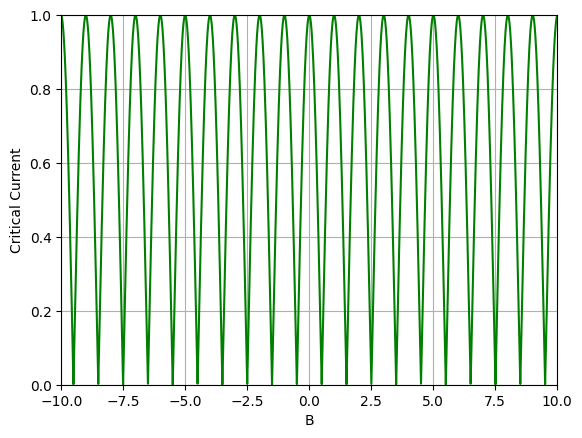

In [50]:
plt.plot(MagField, IMaxPoint, 'g-')
plt.xlabel('B')
plt.ylabel('Critical Current')  
plt.ylim(0,1) 
plt.xlim(-10,10)
plt.grid()            
plt.show()
# plt.savefig('10-random-junctions:B=-5to5.png')

In [51]:
print(max(IMaxPoint))

0.9999850656033442


In [52]:
print(min(IMaxPoint))

0.00014136522804231782


In [53]:
print(np.mean(junctionWidths))

0.0010000000000000005


In [54]:
print(np.std(junctionWidths))

4.336808689942018e-19


In [55]:
diff = []

for n in range(int(len(IMaxPoint)/2)):
    diff.append(np.abs(IMaxPoint[int(len(MagField)/2)-n] - IMaxPoint[int(len(MagField)/2)+n]))

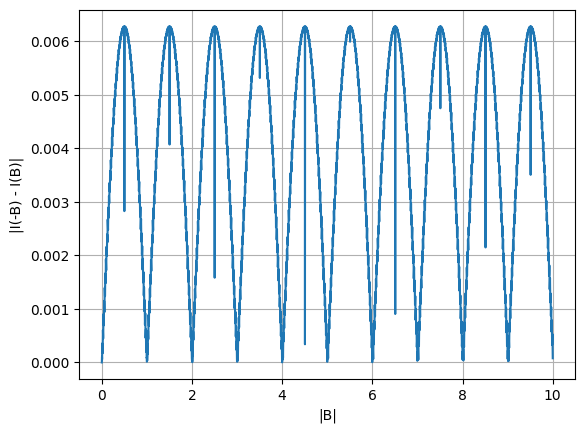

In [56]:
plt.plot(MagField[int(len(MagField)/2):], diff)
plt.xlabel('|B|')
plt.ylabel('|I(-B) - I(B)|')
# plt.ylim(0,1)
plt.grid()
plt.show()

In [57]:
import pandas as pd

In [58]:
data = {'B': MagField, 'I_c': IMaxPoint }
df = pd.DataFrame(data)
csv_path = r"experimental data\model_experimental_data.csv"
df.to_csv(csv_path, index=False)

In [59]:
df = pd.read_csv(r"experimental data\aritifical data\remodified 5.0uV.csv")
compare_ic = np.array(df['I_c'])
diff = compare_ic - IMaxPoint
for i in range(len(diff)):
    diff[i] = diff[i]**2

print(np.sum(diff))

FileNotFoundError: [Errno 2] No such file or directory: 'experimental data\\aritifical data\\remodified 5.0uV.csv'